<a href="https://colab.research.google.com/github/SantiagoHincapieCruz/Relationships-between-process-variables-and-modeling-in-a-manufacturing-plant-Real-process-/blob/main/VP_JIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relationships between process variables and modeling in a manufacturing plant , (Real process)**

***IMPORTANT NOTE: Some names, variables, data, specifications and descriptions have been changed for confidentiality.***

In a manufacturing plant, some variables are evaluated to establish relationships between them, generate models, test these models and optimize them.

# Import and Data set, Data frame

In [82]:
### Preliminars
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [83]:
#import ds correlaciones 1
from google.colab import drive
drive.mount('/content/drive')
import datetime as dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
ds_correlacion=pd.read_excel('/content/drive/MyDrive/DEXCO/Correlaciones para VP-JIS.xlsx')
ds_MDF_AS=pd.read_excel('/content/drive/MyDrive/DEXCO/Correlaciones para VP-JIS.xlsx', sheet_name='MDF AS')
#ds_MDF_AS.info()
d_AS=ds_MDF_AS[['VP','JIS','Calibre','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']].copy()
d_AS.head()
#d_AS.info()

,VP,JIS,Calibre,Res sold/Fib sec,Hum,Vel,Temp 2,Dens,Tracc,euca
0,17.934408,2.4,9.0,10.1,5.846639,285.0,232.0,689.0,6.1,NaN
1,7.816914,2.9,9.0,10.2,6.278106,260.0,229.0,692.0,5.0,NaN
2,13.787458,2.2,9.0,10.0,5.857221,270.0,233.0,682.0,5.2,NaN
3,13.042291,1.4,9.0,10.4,5.106429,300.0,232.0,677.0,5.5,NaN
4,10.155546,1.5,9.0,10.4,5.438172,290.0,230.0,694.0,5.4,NaN


In [85]:
ds_MDF_RH=pd.read_excel('/content/drive/MyDrive/DEXCO/Correlaciones para VP-JIS.xlsx', sheet_name='MDF RH')
#ds_MDF_RH.head()
d_RH=ds_MDF_RH[['VPRH','JISRH','CalibreRH ','Res sold/Fib secRH','Hum RH','Vel RH','Temp 2 RH','Dens RH','Tracci RH','euca RH']].copy()
d_RH.head()
#d_RH.info()

,VPRH,JISRH,CalibreRH,Res sold/Fib secRH,Hum RH,Vel RH,Temp 2 RH,Dens RH,Tracci RH,euca RH
0,7.928793,0.81,15.0,14.2,5.839037,110,225,674,5.8,74.79
1,7.012180,0.26,15.0,14.1,6.326601,110,225,671,6.6,71.96
2,11.742883,0.42,5.5,12.2,6.051449,280,204,741,8.5,54.73
3,8.952057,0.54,5.5,11.4,5.807090,300,205,773,7.6,33.46
4,9.340663,1.00,5.5,12.2,5.057349,300,210,768,8.4,18.88


In [86]:
ds_correlacion=pd.read_excel('/content/drive/MyDrive/DEXCO/Correlaciones para VP-JIS.xlsx')
ds_9mm=pd.read_excel('/content/drive/MyDrive/DEXCO/Correlaciones para VP-JIS.xlsx', sheet_name='9mm')
#ds_9mm.info()
ds_9mm=ds_9mm[['VP','JIS','Calibre','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']].copy()
ds_9mm.head()
#d_AS.info()

,VP,JIS,Calibre,Res sold/Fib sec,Hum,Vel,Temp 2,Dens,Tracc,euca
0,17.934408,2.4,9,10.1,5.846639,285,232,689.0,6.1,NaN
1,7.816914,2.9,9,10.2,6.278106,260,229,692.0,5.0,NaN
2,13.787458,2.2,9,10.0,5.857221,270,233,682.0,5.2,NaN
3,13.042291,1.4,9,10.4,5.106429,300,232,677.0,5.5,NaN
4,10.155546,1.5,9,10.4,5.438172,290,230,694.0,5.4,NaN


# Correlations and Models

# AS All size

**Lineal (Peason)**

<Axes: >

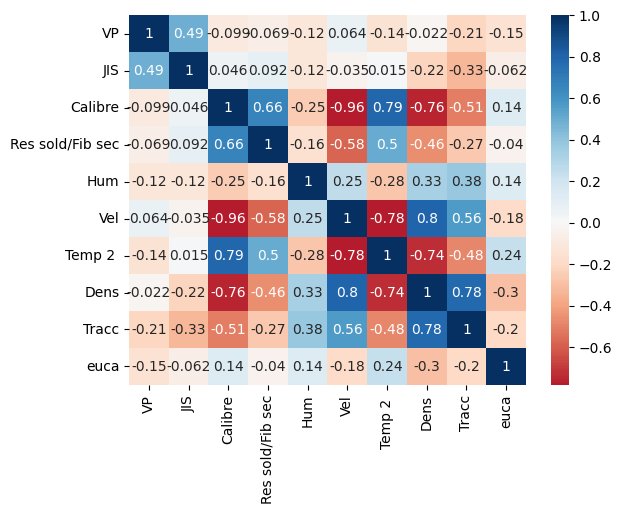

In [6]:
sns.heatmap(data=d_AS[['VP','JIS','Calibre','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']]
            .corr(method='pearson'),cmap='RdBu',center=0,robust=True,annot=True)

Important:JIS,Hum,Temp2,Tracc,euca

**No-Lineal (Spearman)**

<Axes: >

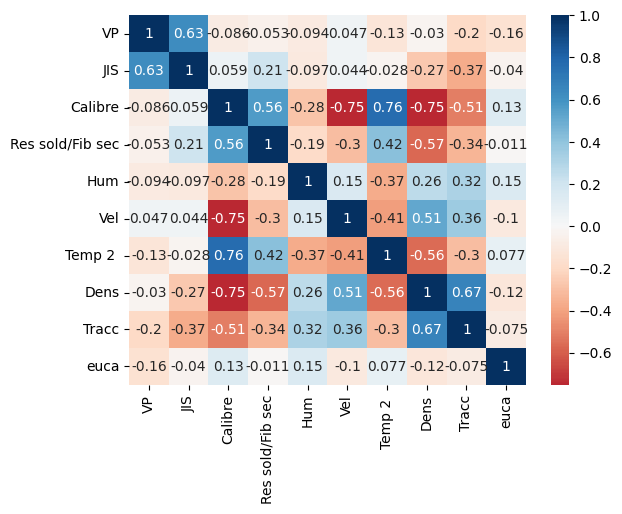

In [7]:
sns.heatmap(data=d_AS[['VP','JIS','Calibre','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']]
            .corr(method='spearman'),cmap='RdBu',center=0,robust=True,annot=True)

Important:JIS,Temp2,Tracc,euca

**AS-OLS Regression**

In [14]:
#All variables
d_AS= d_AS.replace([np.inf, -np.inf], np.nan).dropna()
x_AS=d_AS[['JIS','Calibre','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']]
y_AS=d_AS['VP']
ml_AS=sm.OLS(y_AS,x_AS).fit()
ml_AS.summary()
#print(ml_AS.pvalues)
#print(ml_AS.rsquared)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     VP   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              126.5
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    3.61e-48
Time:                        18:46:19   Log-Likelihood:                         -253.67
No. Observations:                 102   AIC:                                      525.3
Df Residuals:                      93   BIC:                                      549.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
JIS                  5.7412      0.875      6.559      0.000       4.003       7.480
Calibre             -0.8196      0.459     -1.787      0.077      -1.730       0.091
Res sold/Fib sec     0.0200      0.815      0.025      0.980      -1.598       1.638
Hum                 -0.5415      0.398     -1.360      0.177      -1.332       0.249
Vel                 -0.0397      0.021     -1.880      0.063      -0.082       0.002
Temp 2              -0.0099      0.044     -0.224      0.823      -0.098       0.078
Dens                 0.0526      0.017      3.168      0.002       0.020       0.086
Tracc               -0.7457      0.340     -2.193      0.031      -1.421      -0.070
euca                -0.0308      0.028     -1.106      0.272      -0.086       0.024
==============================================================================
Omnibus:                       16.647   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.285
Skew:                           0.599   Prob(JB):                     3.59e-08
Kurtosis:                       5.576   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-Values AS:JIS ,Calibre,Vel,Dens,Tracc

In [36]:
#Only variables with p-values<0.10
d_AS= d_AS.replace([np.inf, -np.inf], np.nan).dropna()
#x_AS2=d_AS[['JIS','Calibre','Vel','Dens','Tracc']]
x_AS2=d_AS[['JIS','Calibre','Vel','Dens']]
y_AS2=d_AS['VP']
ml_AS2=sm.OLS(y_AS2,x_AS2).fit()
ml_AS2.summary()
#print(ml_AS2.params)
#print(ml_AS2.pvalues)
#print(ml_AS2.rsquared)
#eq2='VP='+str(round(ml_AS2.params[0],3))+'*JIS '+str(round(ml_AS2.params[1],3))+'*Calibre '+str(round(ml_AS2.params[2],3))+'*Vel +'+str(round(ml_AS2.params[3],3))+'*Dens '+str(round(ml_AS2.params[4],3))+'*Tracc'
#print(eq2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     VP   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              270.2
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    5.42e-52
Time:                        19:14:48   Log-Likelihood:                         -258.57
No. Observations:                 102   AIC:                                      525.1
Df Residuals:                      98   BIC:                                      535.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
JIS            6.2150      0.840      7.397      0.000       4.548       7.882
Calibre       -0.8511      0.346     -2.460      0.016      -1.538      -0.165
Vel           -0.0457      0.020     -2.256      0.026      -0.086      -0.006
Dens           0.0371      0.012      3.084      0.003       0.013       0.061
==============================================================================
Omnibus:                       27.193   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.113
Skew:                           0.901   Prob(JB):                     8.06e-17
Kurtosis:                       6.767   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**ML-2 Durbin-Watson y Breusch-Godfrey**

In [89]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson

In [37]:
dw_stat = durbin_watson(ml_AS2.resid)
print(f'Durbin-Watson: {dw_stat:.4f}')

bg_test = acorr_breusch_godfrey(ml_AS2, nlags=4)
print(f'Breusch-Godfrey test statistic: {bg_test[0]:.4f}, p-value: {bg_test[1]:.4e}')


Durbin-Watson: 0.9003
Breusch-Godfrey test statistic: 31.0483, p-value: 2.9927e-06


** Final model with HAC**

In [38]:
modelo_hac = ml_AS2.get_robustcov_results(cov_type='HAC', maxlags=4)
print(modelo_hac.summary())

                                 OLS Regression Results                                
Dep. Variable:                     VP   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              116.8
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    2.16e-36
Time:                        19:14:53   Log-Likelihood:                         -258.57
No. Observations:                 102   AIC:                                      525.1
Df Residuals:                      98   BIC:                                      535.6
Df Model:                           4                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

---
VP= 6.2150x(JIS) -0.851x(Calibre)  -0.0457x(Vel) +0.0371x(Dens)

# VP= (6.2150xJIS) -(0.851xCalibre)  -(0.0457xVel) +(0.0371xDens)

For VP=8 , Calibre=9 , Vel=270 , Dens=680 Sln *JIS=0.45*


# AS 9mm Size , without outliers

<Axes: >

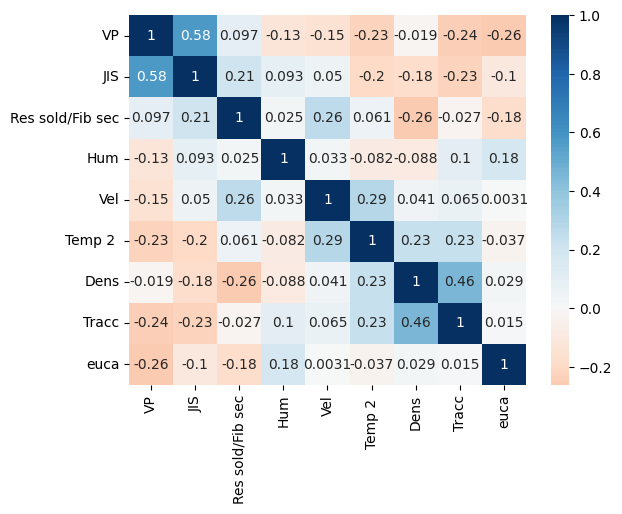

In [40]:
sns.heatmap(data=ds_9mm[['VP','JIS','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']]
            .corr(method='pearson'),cmap='RdBu',center=0,robust=True,annot=True)

Important:JIS,Vel,Temp2,Tracc,euca

**No-Lineal (Spearman) 9mm**

<Axes: >

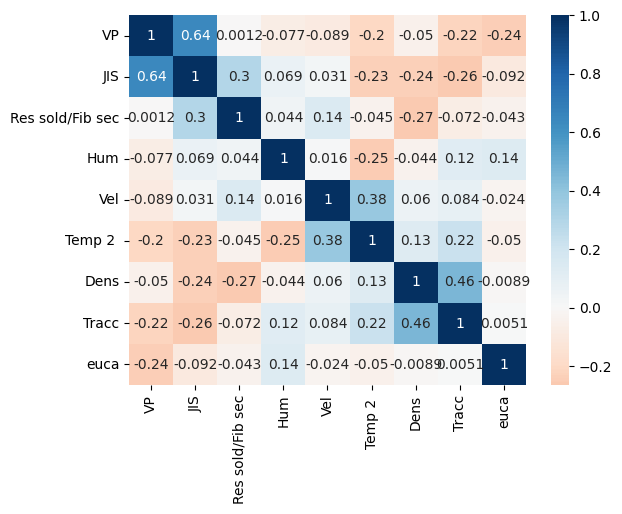

In [43]:
sns.heatmap(data=ds_9mm[['VP','JIS','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']]
            .corr(method='spearman'),cmap='RdBu',center=0,robust=True,annot=True)

Important:JIS,Temp 2,Tracc,euca

**AS 9mm -OLS Regression**

In [69]:
ds_9mm= ds_9mm.replace([np.inf, -np.inf], np.nan).dropna()
x_9mm=ds_9mm[['JIS','Res sold/Fib sec','Hum','Vel','Temp 2 ','Dens','Tracc','euca']]
y_9mm=ds_9mm['VP']
ml_9mm=sm.OLS(y_9mm,x_9mm).fit()
influence = ml_9mm.get_influence()
studentized_residuals = influence.resid_studentized_external
outlier_mask = np.abs(studentized_residuals) > 3
X_clean = x_9mm[~outlier_mask]
y_clean = y_9mm[~outlier_mask]
ml_9mm_clean=sm.OLS(y_clean,X_clean).fit()
ml_9mm_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     VP   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              136.4
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    3.41e-37
Time:                        20:27:17   Log-Likelihood:                         -168.97
No. Observations:                  72   AIC:                                      353.9
Df Residuals:                      64   BIC:                                      372.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
JIS                  6.2693      0.946      6.627      0.000       4.379       8.159
Res sold/Fib sec     0.4235      0.782      0.541      0.590      -1.139       1.986
Hum                 -0.0729      0.441     -0.165      0.869      -0.955       0.809
Vel                 -0.0277      0.031     -0.895      0.374      -0.089       0.034
Temp 2              -0.1055      0.087     -1.218      0.228      -0.279       0.068
Dens                 0.0602      0.025      2.451      0.017       0.011       0.109
Tracc               -0.5562      0.356     -1.564      0.123      -1.267       0.154
euca                -0.0677      0.031     -2.179      0.033      -0.130      -0.006
==============================================================================
Omnibus:                        3.857   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                4.098
Skew:                          -0.127   Prob(JB):                        0.129
Kurtosis:                       4.141   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-Values AS 9mm:JIS ,Den,euca

In [80]:
#Only variables with p-values<0.10
x_9mm_2=X_clean[['JIS','Dens']]
y_9mm_2=y_clean
ml_9mm_2=sm.OLS(y_9mm_2,x_9mm_2).fit()
ml_9mm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     VP   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              504.5
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    2.65e-42
Time:                        20:34:46   Log-Likelihood:                         -174.67
No. Observations:                  72   AIC:                                      353.3
Df Residuals:                      70   BIC:                                      357.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
JIS            6.9144      0.893      7.739      0.000       5.133       8.696
Dens           0.0081      0.001      8.584      0.000       0.006       0.010
==============================================================================
Omnibus:                       13.031   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.867
Skew:                           0.431   Prob(JB):                     1.20e-07
Kurtosis:                       6.143   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
modelo_hac_9mm_2 = ml_9mm_2.get_robustcov_results(cov_type='HAC', maxlags=4)
print(modelo_hac_9mm_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     VP   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              326.6
Date:                Sun, 06 Jul 2025   Prob (F-statistic):                    3.21e-36
Time:                        20:35:14   Log-Likelihood:                         -174.67
No. Observations:                  72   AIC:                                      353.3
Df Residuals:                      70   BIC:                                      357.9
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# VP_9mm= (6.9144xJIS) +(0.0081xDens)

In this case the speed does not affect as much because for the entire size the speeds do not change between them, when the size is changed the speed change does generate greater changes.

En este caso la velocidad no afecta tanto porque para todo el calibre las
velocidades no cambian entre si, cuando se cambia de calibre el cambio de velocidad si genera mayores cambios.

For VP=8 , Dens=680 Sln *JIS=0.36*


For our plant conditions, the relationship between VP and JIS changes compared to x country because the operating conditions are different, so the data and models that depend on the variables are different.

Para nuestras condiciones en planta la relacion entre VP y JIS cambia en comparacion x pais porque las condiciones de operacion son diferentes, entonces los datos y los modelos que dependen de las variables son diferentes.